<a href="https://colab.research.google.com/github/minhyeok2001/Computer-Vision/blob/main/Classic_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [1]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_syste

In [2]:
from datasets import load_dataset
from transformers import AutoTokenizer

dataset = load_dataset("wmt16", "de-en", split="train[:1%]")  # WMT16 영어-독일어 데이터

print(dataset['translation'][1])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/282M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/267M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/277M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/343k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/475k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4548885 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2169 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2999 [00:00<?, ? examples/s]

{'de': 'Ich erkläre die am Freitag, dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen, wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe, daß Sie schöne Ferien hatten.', 'en': 'I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999, and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period.'}


In [3]:
from sklearn.model_selection import train_test_split

tokenizer_name = "Helsinki-NLP/opus-mt-en-de"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
tokenizer.add_special_tokens({"bos_token": "<s>"})

tokenizer.src_lang = "en"  # 영어
tokenizer.tgt_lang = "de"  # 독일어

# 2. 데이터 분리 (영어와 독일어 추출)
src_texts = [example["translation"]["en"] for example in dataset]  # 영어 문장
tgt_texts = [example["translation"]["de"] for example in dataset]  # 독일어 문장

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [4]:
print(src_texts[0])

Resumption of the session


In [5]:
src_texts = [tokenizer.bos_token + " " + sentence for sentence in src_texts]
tgt_texts = [tokenizer.bos_token + " " + sentence for sentence in tgt_texts]

# 3. Train/Test Split
train_src, test_src, train_tgt, test_tgt = train_test_split(src_texts, tgt_texts, test_size=0.2, random_state=42)

print("Train 데이터 개수:", len(train_src))
print("Test 데이터 개수:", len(test_src))

# 5. Train 데이터 토크나이즈
train_encodings = tokenizer(
    train_src,
    text_target=train_tgt,  # 번역 대상 (독일어)
    padding=True,
    truncation=True,
    max_length=64,
    return_tensors="pt"  # PyTorch 텐서 반환
)

# 6. Test 데이터 토크나이즈
test_encodings = tokenizer(
    test_src,
    text_target=test_tgt,
    padding=True,
    truncation=True,
    max_length=64,
    return_tensors="pt"
)

Train 데이터 개수: 36391
Test 데이터 개수: 9098


# Data loader 올리기

- data 형식 출력부터

In [6]:
print(train_encodings["input_ids"].shape)
print(train_encodings["labels"].shape)

torch.Size([36391, 64])
torch.Size([36391, 64])


- 직접 뽑아보니, 각 문장 앞에 __en__이거 제거 필요함

In [7]:
decoded_token = tokenizer.convert_ids_to_tokens(157)
print("Token:", decoded_token)

Token: ▁We


In [8]:
count = 0
for value in train_encodings["input_ids"]:
  if value[-1] != 58100:
    count += 1

print(count)

2034


- 근데 마침 sos 토큰 없으니까, -> 그냥 일단 __en__ 이런걸로 sos 를 대체할 수도 있을거같음

In [9]:
'''
train_encodings["input_ids"] = train_encodings["input_ids"][:, 1:]
train_encodings["attention_mask"] = train_encodings["attention_mask"][:, 1:]
train_encodings["labels"] = train_encodings["labels"][:, 1:]

test_encodings["input_ids"] = test_encodings["input_ids"][:,1:]
test_encodings["attention_mask"] = test_encodings["attention_mask"][:,1:]
test_encodings["labels"] = test_encodings["labels"][:,1:]
'''

'\ntrain_encodings["input_ids"] = train_encodings["input_ids"][:, 1:]\ntrain_encodings["attention_mask"] = train_encodings["attention_mask"][:, 1:]\ntrain_encodings["labels"] = train_encodings["labels"][:, 1:]\n\ntest_encodings["input_ids"] = test_encodings["input_ids"][:,1:]\ntest_encodings["attention_mask"] = test_encodings["attention_mask"][:,1:]\ntest_encodings["labels"] = test_encodings["labels"][:,1:]\n'

In [10]:
print(tokenizer.special_tokens_map)
print(tokenizer.convert_tokens_to_ids("</s>"))
print(tokenizer.convert_tokens_to_ids("<unk>"))
print(tokenizer.convert_tokens_to_ids("<pad>"))

{'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}
0
1
58100


- 현재 트랜스포머 모델에서는 굳이 eos sos 토큰 구분 필요 없어보이므로 일단 eos로 통일 -> ㄴㄴㄴㄴ 필요할거같아

- 위 결과를 통해서, 각 서브워드가 하나의 토큰으로 변환되었음을 확인 ( vector는 나중에 embedding에서 이루어짐 )

In [11]:
train_encodings.keys()

dict_keys(['input_ids', 'attention_mask', 'labels'])

- 주의 !! 그 앞에서 unet 하던때랑 똑같이, 들어가는 값 다 연결해서 dataset에 넣고 dataloader 올려야함

In [12]:
import torch

train_dataset = torch.utils.data.TensorDataset(
    train_encodings["input_ids"],
    train_encodings["attention_mask"],
    train_encodings["labels"]
)

test_dataset = torch.utils.data.TensorDataset(
    test_encodings["input_ids"],
    test_encodings["attention_mask"],
    test_encodings["labels"]
)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64,shuffle=True)
test_loader =  torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64)

In [13]:
for input, mask, label in train_loader:
  print(input)
  print(mask)
  print(label)
  break

tensor([[58101,   432,    14,  ..., 58100, 58100, 58100],
        [58101, 14519,   377,  ..., 58100, 58100, 58100],
        [58101,    38,   206,  ...,  1033,     8,     0],
        ...,
        [58101,  2286,  1915,  ..., 58100, 58100, 58100],
        [58101, 18687,   301,  ..., 58100, 58100, 58100],
        [58101,  6223,  5902,  ..., 58100, 58100, 58100]])
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
tensor([[58101,   105,   921,  ..., 58100, 58100, 58100],
        [58101,  1019, 14519,  ..., 58100, 58100, 58100],
        [58101,   105, 16412,  ...,    21, 19650,     0],
        ...,
        [58101,   323,  3219,  ..., 58100, 58100, 58100],
        [58101,    55,   411,  ..., 58100, 58100, 58100],
        [58101,   525,   410,  ..., 58100, 58100, 58100]])


-아 .... 이 mask가 attention 마스크가 아니라 padding용 마스크 .....

In [14]:
for input, mask, label in train_loader:
  print(input[0])
  for idx,_ in enumerate(input[0]):
    if _ == 1 :
      print(idx)
      break

  print(mask[0])
  for idx,_ in enumerate(mask[0]):
    if _ == 0 :
      print(idx)
      break
  break

tensor([58101,   248,     5,  6418,     2,   381,   710,     2,     8,    32,
         3802,     7,     4, 27123,   952,     2,    38,  3210,    60,   714,
           86,    95,    73,  3793,    32,  6562,     3,     0, 58100, 58100,
        58100, 58100, 58100, 58100, 58100, 58100, 58100, 58100, 58100, 58100,
        58100, 58100, 58100, 58100, 58100, 58100, 58100, 58100, 58100, 58100,
        58100, 58100, 58100, 58100, 58100, 58100, 58100, 58100, 58100, 58100,
        58100, 58100, 58100, 58100])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
28


In [15]:
i=0
for input, mask, label in train_loader:
  for k in input :
    print(tokenizer.convert_ids_to_tokens(k))
    if i > 3:
      break
    i += 1
  print(mask)
  print(label)
  print(label.shape)
  break

['<s>', '▁In', '▁the', '▁event', '▁we', '▁had', '▁to', '▁have', '▁several', '▁meetings', '▁before', '▁the', '▁Council', '▁finally', '▁increased', '▁this', '▁to', '▁a', '▁substantial', '▁amount', '.', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['<s>', '▁And', '▁we', '▁asked', '▁for', '▁more', '▁precise', '▁measuring', '▁methods', ';', '▁in', '▁my', '▁opinion', ',', '▁the', '▁I', 's', 'pra', '▁research', '▁institute', '▁has', '▁a', 'c', 'quit', 'ted', '▁itself', '▁of', '▁this', '▁task', '▁quite', '▁ad', 'mir', 'ably', '.', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad

In [16]:
print("Vocabulary Size:", tokenizer.vocab_size)
print("Vocabulary Size:", len(tokenizer))


Vocabulary Size: 58101
Vocabulary Size: 58102


# 모델 만들기

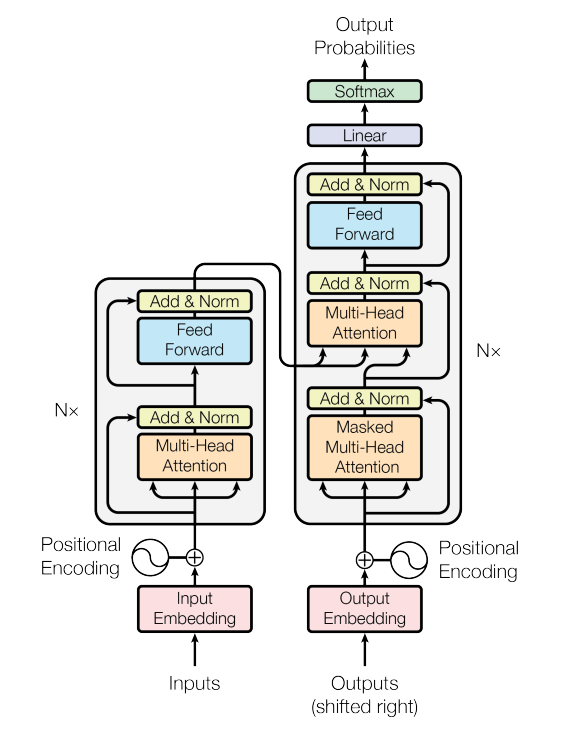

## input embedding

  - point 1 : self.embed.out_features로 outdim 구하기
  - point 2 : unsqueeze로 dim 맞추기. 여기서, 1 이거는 0차원임 !! [1] 이게 1차원이고
  - point 3 : torch.empty 와 torch.cat 이용하기 이때 empty는 생성할 차원 넣어줘야함
    -> 근데 torch.cat을 하면 stack 느낌이 아니라 그냥 말 그대로 concat이라, 이런 상황에는 stack이 더 좋을듯
  - point 4 : stack을 하려면, list로 해야함. 반면 cat은 tensor끼리만 ㄱ나으

In [17]:
import torch.nn as nn

# 아마 forward의 x로는 문장이 들어오겠지?
# 그러면 토큰 개수 -> embedding_dim 인 nn.linear가 필요하겠지??
## 근데 이렇게하면,하나의 문장이 embedding dim 처럼 되는데?? 우리가 원하는거는 하나의 단어 당 embedding dim만큼 나와야하는데

# len(tokenizer)를 통해서 알아낸 결과를 input_dim에 넣어야함.
# embedding_dim : hidden dim

class input_embedding(nn.Module):
  def __init__(self,input_dim,embedding_dim):
    super().__init__()
    self.embedding_dim = embedding_dim
    self.embed = nn.Embedding(input_dim,embedding_dim)

  def forward(self,x): ## x : [ batch , words ]
    num_batch, num_token = x.shape
    #print(x.shape)
    embedding_result = torch.empty((0,num_token,self.embedding_dim))
    #print(embedding_result)
    for sentence in x :
      sentence_embedding = torch.empty((0,self.embedding_dim))
      for word in sentence :  ## 지금 word는 0차원임. 따라서 1차원으로 늘려줘야함
        #print((word.unsqueeze(0).shape))  ## 0번째에 차원 늘려주기
        #print((self.embed(word.unsqueeze(0)).shape))
        #print(sentence_embedding.shape)
        sentence_embedding = torch.cat([sentence_embedding,self.embed(word).unsqueeze(0)]) ## [ words, embedding ]
      sentence_embedding = sentence_embedding.unsqueeze(0)
      #print(embedding_result.shape)
      #print(sentence_embedding.shape)
      embedding_result = torch.cat([embedding_result,sentence_embedding])
      #print(embedding_result.shape)

    return embedding_result

- 테스트

In [18]:
# test

model = input_embedding(input_dim=len(tokenizer), embedding_dim=10)

for batch in train_loader:
    input_ids = batch[0]
    break

output=model(input_ids)

print(input_ids.shape)
print(output.shape)
#print(output)


torch.Size([64, 64])
torch.Size([64, 64, 10])


## positional encoding

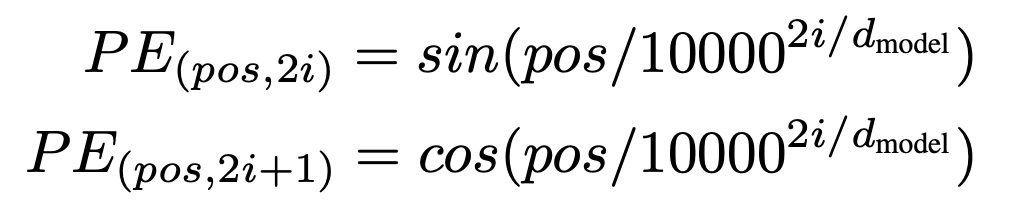

Q. 이거 SOS, EOS도 PE 더해줘야하나??

- A. 이거 이후에 decoder에서 명시적으로 SOS, EOS 이용하는지 확인해봐야할듯

In [19]:
import math

class sinusoidal:
    def __init__(self, token_len, embedding_dim):
        self.embedding_dim = embedding_dim
        self.token_len = token_len

    def calculate(self):
        pe = torch.zeros(self.token_len, self.embedding_dim)  # (token_len, embedding_dim)
        position = torch.arange(self.token_len, dtype=torch.float).unsqueeze(1)  # 여기서 pos 맞게 숫자 설정
        div_term = torch.exp(torch.arange(0, self.embedding_dim, 2).float() * (-math.log(10000.0) / self.embedding_dim))  # (embedding_dim/2,) -> 이렇게 지수를 ln꼴로 바꿔서 구하는 것이 더 빠르다고함
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        return pe

class positional_encoding(nn.Module):
  def __init__(self, token_len, embedding_dim):
    super().__init__()
    self.sinusoidal = sinusoidal(token_len,embedding_dim)

  def forward(self,x):  # x : [num batch, num token, embedding]
    num_batch,num_token,embedding = x.shape
    pos_encoding = self.sinusoidal.calculate()

    pos_encoding = pos_encoding.unsqueeze(0).expand(num_batch, -1, -1)  # expand 통해서 배치사이즈만큼 확장

    return x + pos_encoding

- 확인

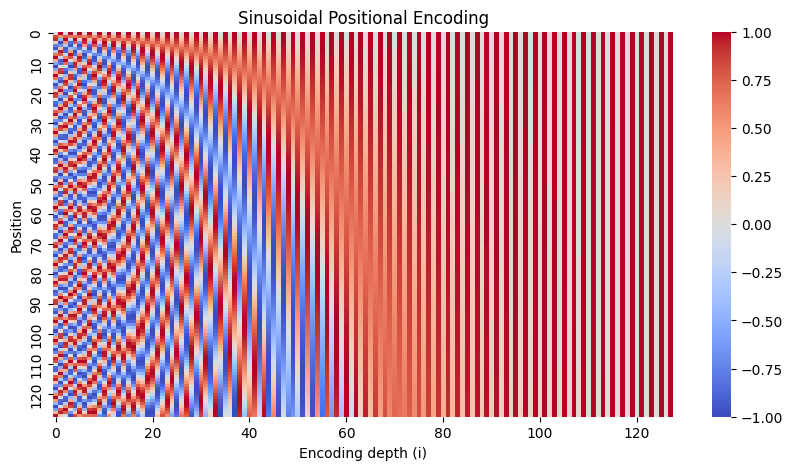

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

ex_token_len = 128
ex_embedding_dim = 128
ex_sinusoidal = sinusoidal(ex_token_len, ex_embedding_dim)
ex_positional_encoding = ex_sinusoidal.calculate()

ex_positional_encoding = ex_positional_encoding.numpy()
plt.figure(figsize=(10, 5))
sns.heatmap(ex_positional_encoding, cmap="coolwarm", xticklabels=20, yticklabels=10)
plt.xlabel("Encoding depth (i)")
plt.ylabel("Position")
plt.title("Sinusoidal Positional Encoding")
plt.show()

## multihead attention

- multi-head 부분은, 파라미터를 각각 헤드마다 설정하는게 아니라 마지막 forward에서 view를 통해서 조정함
- add & norm에서 norm은 batch 아니고 layer norm임 >> 노션에 정리해뒀음
- softmax의 dim은 마지막 차원으로 ( 헷갈리면 torch,tf 정리본 보기 )
- 저번에도 했는데 왜 까먹지? MHA 끝에는 반드시 linear 붙어야함


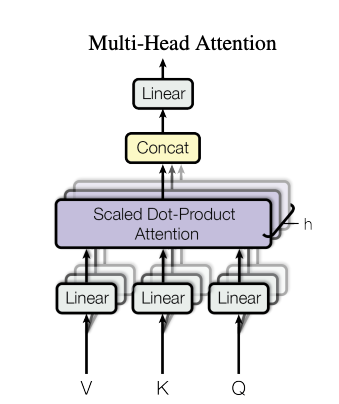

In [21]:
class multihead_attention(nn.Module):
  def __init__(self,num_head,token_len,embedding_dim):
    super().__init__()
    if embedding_dim % num_head != 0 :
      assert False, " division failure "

    self.num_head = num_head

    self.key= nn.Linear(embedding_dim,embedding_dim)
    self.query= nn.Linear(embedding_dim,embedding_dim)
    self.value= nn.Linear(embedding_dim,embedding_dim)

    self.fc = nn.Linear(embedding_dim,embedding_dim)

    self.layernorm = nn.LayerNorm(embedding_dim)

  def forward(self,x):  # x : [batch, token, embedding]
    num_batch,num_token,num_embedding = x.shape
    x_residual = x

    K = self.key(x)
    Q = self.query(x)
    V = self.value(x)

    ## 지금 각 KQV는 batch * token * embedding dim임
    ## 이걸 우리는 batch * head * token * per_embedding 으로 바꾸고싶음

    """
    K = K.view(num_batch,self.num_head,num_token,num_embedding//self.num_head)
    -> 주의 !!!
    이따구로 하면 안됨. 왜냐하면, 이렇게 하면 차원만 맞춰지는거지 실제 의도한대로 텐서가 잘리는게 아님 !!!
    """

    K = K.view(num_batch,num_token,self.num_head,-1).permute(0,2,1,3)  ## 마지막은 embedding dim을 head로 나눈 값
    Q = Q.view(num_batch,num_token,self.num_head,-1).permute(0,2,1,3)
    V = V.view(num_batch,num_token,self.num_head,-1).permute(0,2,1,3)

    attention = torch.matmul(Q,K.transpose(2,3))/math.sqrt(num_embedding//self.num_head) ## batch * head * token * embedding
    attention = torch.softmax(attention,dim=-1) ## attention은 batch * head * embedding * embedding 꼴임
    x = torch.matmul(attention,V)

    ## 이제 잘린거 붙이기  x : batch * head * token * per_embedding

    x = x.permute(0,2,1,3).contiguous()
    x = x.view(num_batch,num_token,-1)

    ## 마지막 fc

    x = self.fc(x)

    ## add norm

    x = x + x_residual
    x = self.layernorm(x)

    return x, attention


## feed forward

In [22]:
class feed_forward(nn.Module):
  def __init__(self,input_dim,hidden_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim,hidden_dim)
    self.fc2 = nn.Linear(hidden_dim,input_dim)
    self.ln = nn.LayerNorm(input_dim)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.3)

  def forward(self,x):
    residual_x = x
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)

    x = x + residual_x
    x = self.ln(x)

    return x

## masked multihead attention

-> 위에거 보지말고 다시짜기

- masking 위치가 어디?? 만약 q k 곱한뒤에 더하는거라면, ... q k -> 이거 attention 구할때는 뒤에 정보 학습되는거 아잉교???

헷갈렸던 부분
- trg랑 src랑 문장 길이가 다를 수 있는데 마스크 어떻게하지

In [23]:
class masked_multihead_attention(nn.Module):
  def __init__(self,num_head,token_len,embedding_dim):
    super().__init__()

    if embedding_dim%num_head != 0:
      assert False, "invalid division !!"

    self.num_head = num_head
    self.key= nn.Linear(embedding_dim,embedding_dim)
    self.query= nn.Linear(embedding_dim,embedding_dim)
    self.value= nn.Linear(embedding_dim,embedding_dim)

    self.fc = nn.Linear(embedding_dim,embedding_dim)
    self.ln = nn.LayerNorm(embedding_dim)

  def forward(self,x):
    num_batch, num_token, embedding_dim = x.shape
    residual_x = x

    # k q v 행렬 만들기
    K = self.key(x)
    Q = self.query(x)
    V = self.value(x)

    # 이거 multi-head로 바꾸기
    # 지금은 batch * token * embedding dim 꼴임
    K = K.view(num_batch,num_token,self.num_head,-1).permute(0,2,1,3)
    Q = Q.view(num_batch,num_token,self.num_head,-1).permute(0,2,1,3)
    V = V.view(num_batch,num_token,self.num_head,-1).permute(0,2,1,3)
    # 이제는 batch * head * token * segmented_embedding_dim 꼴

    ## attention 연산
    attention = torch.matmul(Q,K.transpose(2,3))/math.sqrt(embedding_dim//self.num_head)

    #print(attention.shape)

    ## mask 추가

    attention_mask = torch.triu(torch.ones(attention.shape[-1],attention.shape[-1]),diagonal=1) * -1e9
    #print(attention_mask) ## 출력 정상

    #print("Is any inf in attention?", torch.isinf(attention).any())  문제없음
    #print("Is any NaN in attention?", torch.isnan(attention).any())  문제없음

    #print(attention.shape)
    #print(attention_mask.shape)
    #print("before add mask : ", attention) ## 출력 정상
    attention = torch.add(attention,attention_mask)


    #print("attention : ",attention) ## -> ?? 이거 왜 여기부터 NAN??

    attention = torch.softmax(attention,dim=-1)
    #print("softmaxed attention : ", attention)
    x = torch.matmul(attention,V)


    ## 차원 복구
    ## 현재 x는 batch * head * token * segmented_embedding_dim

    x = x.permute(0,2,1,3).contiguous()
    x = x.view(num_batch,num_token,-1)

    x = self.fc(x)

    ## add norm
    x = x + residual_x
    x = self.ln(x)

    return x , attention

## encoder-decoder MHA

- 지금은 다 짰으니까 그냥 하는데, 다음부터는 forward 받을때 key query value에 쓸 행렬 따로따로 설정해주는게 좋을듯 (self,k,q,v)

- Q. ?? 근데 만약 src랑 trg랑 단어 개수가 다르면 어떻게해??
  - A. 내 생각에는, 이거 어차피 max token은 128같은걸로 우리가 fix 시키니까 괜찮을거같은데

In [24]:
class encoder_decoder_multihead_attention(nn.Module):
  def __init__(self,num_head,token_len,embedding_dim):
    super().__init__()

    if embedding_dim%num_head != 0:
      assert False, "invalid division !!"

    self.num_head = num_head

    self.key= nn.Linear(embedding_dim,embedding_dim)
    self.query= nn.Linear(embedding_dim,embedding_dim)
    self.value= nn.Linear(embedding_dim,embedding_dim)

    self.fc = nn.Linear(embedding_dim,embedding_dim)
    self.ln = nn.LayerNorm(embedding_dim)

  def forward(self,src,x): ## 코드 재활용을 위해 x가 trg임
    num_batch, num_token, embedding_dim = src.shape
    residual_x = x

    # k q v 행렬 만들기
    K = self.key(src)
    Q = self.query(x)
    V = self.value(src)

    # 이거 multi-head로 바꾸기
    # 지금은 batch * token * embedding dim 꼴임
    K = K.view(num_batch,num_token,self.num_head,-1).permute(0,2,1,3)
    Q = Q.view(num_batch,num_token,self.num_head,-1).permute(0,2,1,3)
    V = V.view(num_batch,num_token,self.num_head,-1).permute(0,2,1,3)
    # 이제는 batch * head * token * segmented_embedding_dim 꼴

    ## attention 연산
    attention = torch.matmul(Q,K.transpose(2,3))/math.sqrt(embedding_dim//self.num_head)
    attention = torch.softmax(attention,dim=-1)
    x = torch.matmul(attention,V)

    ## 차원 복구
    ## 현재 x는 batch * head * token * segmented_embedding_dim

    x = x.permute(0,2,1,3).contiguous()
    x = x.view(num_batch,num_token,-1)

    x = self.fc(x)

    ## add norm
    x = x + residual_x
    x = self.ln(x)

    return x , attention

## encoder layer

- 블록 만들때 nn.ModuleList 사용

In [25]:
class encoder_layer(nn.Module):
  def __init__(self,num_head,token_len,embedding_dim,hidden_dim):
    super().__init__()
    self.multihead_attention = multihead_attention(num_head,token_len,embedding_dim)
    self.feed_forward = feed_forward(embedding_dim,hidden_dim)

  def forward(self,x):
    x,attention = self.multihead_attention(x)
    x = self.feed_forward(x)
    #print("encoder!!",x[0])
    return x

## decoder layer

In [26]:
class decoder_layer(nn.Module):
  def __init__(self,num_head,token_len,embedding_dim,hidden_dim):
    super().__init__()
    self.masked_multihead_attention = masked_multihead_attention(num_head,token_len,embedding_dim)
    self.encoder_decoder_multihead_attention = encoder_decoder_multihead_attention(num_head,token_len,embedding_dim)
    self.feed_forward = feed_forward(embedding_dim,hidden_dim)

  def forward(self,src,trg):
    x,attention = self.masked_multihead_attention(trg)
    #print("decoder!! 2",x[0]) -> 여기부터 전부다 NAN. 아마 마스킹에서 문제가 있는듯
    x,attention = self.encoder_decoder_multihead_attention(src,x)
    #print("decoder!! 3",x[0])
    x = self.feed_forward(x)
    #print("decoder!! 4",x[0])

    return x

## TRANSFORMER

In [27]:
class transformer(nn.Module):
  def __init__(self,num_head,token_len,embedding_dim,hidden_dim,num_layers,input_dim,output_dim):
    super().__init__()
    self.input_embedding = input_embedding(input_dim,embedding_dim)
    self.src_pe = positional_encoding(token_len,embedding_dim)
    self.trg_pe =  positional_encoding(token_len,embedding_dim)
    self.encoder = nn.ModuleList([encoder_layer(num_head,token_len,embedding_dim,hidden_dim) for _ in range(num_layers)])
    self.decoder = nn.ModuleList([decoder_layer(num_head,token_len,embedding_dim,hidden_dim) for _ in range(num_layers)])
    self.fc = nn.Linear(embedding_dim,output_dim)

  def forward(self,src,trg):
    x = self.input_embedding(src)
    x = self.src_pe(x)

    y = self.input_embedding(trg)
    y = self.trg_pe(y)

    for layer in self.encoder:
        x = layer(x)

    for layer in self.decoder:
        x = layer(x, y)

    x = self.fc(x)
    return x


- 파라미터 확인

In [28]:
model = transformer(num_head=4,token_len=64,embedding_dim=128,hidden_dim=256,num_layers=2,input_dim=len(tokenizer),output_dim=len(tokenizer))

In [29]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 15,594,742 trainable parameters


In [30]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

model.apply(initialize_weights)

transformer(
  (input_embedding): input_embedding(
    (embed): Embedding(58102, 128)
  )
  (src_pe): positional_encoding()
  (trg_pe): positional_encoding()
  (encoder): ModuleList(
    (0-1): 2 x encoder_layer(
      (multihead_attention): multihead_attention(
        (key): Linear(in_features=128, out_features=128, bias=True)
        (query): Linear(in_features=128, out_features=128, bias=True)
        (value): Linear(in_features=128, out_features=128, bias=True)
        (fc): Linear(in_features=128, out_features=128, bias=True)
        (layernorm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      )
      (feed_forward): feed_forward(
        (fc1): Linear(in_features=128, out_features=256, bias=True)
        (fc2): Linear(in_features=256, out_features=128, bias=True)
        (ln): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (relu): ReLU()
        (dropout): Dropout(p=0.3, inplace=False)
      )
    )
  )
  (decoder): ModuleList(
    (0-1): 2 x decoder_l

- output embedding 부분에 들어가는 trg 문장들은, 병렬처리를 위해서 입력에는 SOS 넣고 밀고, 출력에는 EOS 넣고 미는 식으로
  - 그치만 지금은 이미 토큰단계에서 두개 모두 들어갔으므로, 그냥 한번 밀고 당기는 식으로 진행 ( 끝에는 padding 토큰 추가 )

In [31]:
import torch.optim as optim

from tqdm import tqdm

num_epochs = 1
learning_rate = 5e-4

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in tqdm(range(num_epochs)):
    model.train()
    total_loss = 0

    for src,mask,trg in tqdm(train_loader):
        #print(trg.shape)
        trg_input = trg
        trg_output = trg[:, 1:].contiguous()

        ## 지금 모든 문장은 <bos> i love you <eos> <pad> ,,, 이런식임 BO
        ## input때는 괜찮은데, output때는 bos 밀고 끝에 pad 토큰 추가

        trg_output = torch.cat((trg_output, torch.full((src.shape[0], 1),58100)),dim=1)
        #print(trg_input.shape)
        #print(trg_output.shape)
        trg_output = trg_output.view(-1)

        #print(trg_input)

        #torch.autograd.set_detect_anomaly(True)

        ## input 과 output 제대로 비교해보자.
        # transformer 결과로 나오는거는 output dim 만큼의 확률인데,,,.....

        output = model(src, trg_input)
        output = output.view(-1, output.shape[-1])
        #print(trg_output.shape)
        #print(output.shape)
        #print("Output contains NaN:", torch.isnan(output).any().item())
        loss = criterion(output, trg_output)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        print("loss : ", total_loss)


    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}")



  0%|          | 1/569 [00:12<2:01:05, 12.79s/it]

loss :  10.965188026428223



  0%|          | 2/569 [00:24<1:57:34, 12.44s/it]

loss :  21.747846603393555



  1%|          | 3/569 [00:36<1:55:08, 12.21s/it]

loss :  32.40770626068115



  1%|          | 4/569 [00:49<1:55:34, 12.27s/it]

loss :  42.98297691345215



  1%|          | 5/569 [01:01<1:55:25, 12.28s/it]

loss :  53.45705318450928



  1%|          | 6/569 [01:13<1:54:53, 12.24s/it]

loss :  63.847702980041504



  1%|          | 7/569 [01:25<1:53:52, 12.16s/it]

loss :  74.12872409820557



  1%|▏         | 8/569 [01:37<1:53:25, 12.13s/it]

loss :  84.31666374206543



  2%|▏         | 9/569 [01:49<1:53:01, 12.11s/it]

loss :  94.39122295379639



  2%|▏         | 10/569 [02:02<1:53:06, 12.14s/it]

loss :  104.43935871124268



  2%|▏         | 11/569 [02:14<1:52:31, 12.10s/it]

loss :  114.33835506439209



  2%|▏         | 12/569 [02:26<1:52:57, 12.17s/it]

loss :  124.17194938659668



  2%|▏         | 13/569 [02:38<1:53:12, 12.22s/it]

loss :  133.94200611114502



  2%|▏         | 14/569 [02:50<1:52:34, 12.17s/it]

loss :  143.55536460876465



  3%|▎         | 15/569 [03:02<1:51:47, 12.11s/it]

loss :  153.17540836334229



  3%|▎         | 16/569 [03:14<1:50:46, 12.02s/it]

loss :  162.69041633605957



  3%|▎         | 17/569 [03:26<1:50:40, 12.03s/it]

loss :  172.02676486968994



  3%|▎         | 18/569 [03:38<1:50:44, 12.06s/it]

loss :  181.2795696258545



  3%|▎         | 19/569 [03:51<1:51:38, 12.18s/it]

loss :  190.46846771240234



  4%|▎         | 20/569 [04:03<1:51:12, 12.15s/it]

loss :  199.57250499725342



  4%|▎         | 21/569 [04:15<1:51:21, 12.19s/it]

loss :  208.52722454071045



  4%|▍         | 22/569 [04:27<1:50:53, 12.16s/it]

loss :  217.3886194229126



  4%|▍         | 23/569 [04:39<1:49:37, 12.05s/it]

loss :  226.13712882995605



  4%|▍         | 24/569 [04:51<1:50:02, 12.12s/it]

loss :  234.78362464904785



  4%|▍         | 25/569 [05:03<1:49:20, 12.06s/it]

loss :  243.39204692840576



  5%|▍         | 26/569 [05:15<1:48:40, 12.01s/it]

loss :  251.86715412139893



  5%|▍         | 27/569 [05:27<1:48:31, 12.01s/it]

loss :  260.2053985595703



  5%|▍         | 28/569 [05:39<1:48:11, 12.00s/it]

loss :  268.5399694442749



  5%|▌         | 29/569 [05:51<1:47:51, 11.98s/it]

loss :  276.7586488723755



  5%|▌         | 30/569 [06:03<1:48:27, 12.07s/it]

loss :  284.92651081085205



  5%|▌         | 31/569 [06:16<1:48:59, 12.16s/it]

loss :  292.8720488548279



  6%|▌         | 32/569 [06:28<1:49:01, 12.18s/it]

loss :  300.80709171295166



  6%|▌         | 33/569 [06:40<1:48:21, 12.13s/it]

loss :  308.54391050338745



  6%|▌         | 34/569 [06:52<1:48:55, 12.22s/it]

loss :  316.2995777130127



  6%|▌         | 35/569 [07:05<1:48:53, 12.24s/it]

loss :  323.93292808532715



  6%|▋         | 36/569 [07:17<1:49:00, 12.27s/it]

loss :  331.49002742767334



  7%|▋         | 37/569 [07:29<1:48:15, 12.21s/it]

loss :  338.96275901794434



  7%|▋         | 38/569 [07:41<1:47:31, 12.15s/it]

loss :  346.4040198326111



  7%|▋         | 39/569 [07:53<1:47:19, 12.15s/it]

loss :  353.7227921485901



  7%|▋         | 40/569 [08:05<1:46:50, 12.12s/it]

loss :  361.05363941192627



  7%|▋         | 41/569 [08:17<1:46:55, 12.15s/it]

loss :  368.1626272201538



  7%|▋         | 42/569 [08:30<1:47:00, 12.18s/it]

loss :  375.24365282058716



  8%|▊         | 43/569 [08:42<1:46:45, 12.18s/it]

loss :  382.2076783180237



  8%|▊         | 44/569 [08:54<1:46:29, 12.17s/it]

loss :  389.0057997703552



  8%|▊         | 45/569 [09:06<1:46:21, 12.18s/it]

loss :  395.8381304740906



  8%|▊         | 46/569 [09:18<1:45:44, 12.13s/it]

loss :  402.4839177131653



  8%|▊         | 47/569 [09:30<1:44:52, 12.06s/it]

loss :  409.16118335723877



  8%|▊         | 48/569 [09:42<1:45:28, 12.15s/it]

loss :  415.68465423583984



  9%|▊         | 49/569 [09:55<1:45:01, 12.12s/it]

loss :  422.2550415992737



  9%|▉         | 50/569 [10:06<1:44:13, 12.05s/it]

loss :  428.7541494369507



  9%|▉         | 51/569 [10:19<1:45:05, 12.17s/it]

loss :  434.9557113647461



  9%|▉         | 52/569 [10:31<1:44:38, 12.14s/it]

loss :  441.146089553833



  9%|▉         | 53/569 [10:43<1:44:39, 12.17s/it]

loss :  447.28704500198364



  9%|▉         | 54/569 [10:55<1:43:52, 12.10s/it]

loss :  453.5132384300232



 10%|▉         | 55/569 [11:07<1:43:44, 12.11s/it]

loss :  459.3606586456299



 10%|▉         | 56/569 [11:19<1:43:14, 12.07s/it]

loss :  465.4003052711487



 10%|█         | 57/569 [11:31<1:42:38, 12.03s/it]

loss :  471.37307929992676



 10%|█         | 58/569 [11:43<1:42:40, 12.06s/it]

loss :  477.2414402961731



 10%|█         | 59/569 [11:56<1:44:52, 12.34s/it]

loss :  482.92593145370483



 11%|█         | 60/569 [12:09<1:44:30, 12.32s/it]

loss :  488.52890491485596



 11%|█         | 61/569 [12:21<1:43:39, 12.24s/it]

loss :  494.111385345459



 11%|█         | 62/569 [12:33<1:44:01, 12.31s/it]

loss :  499.81534481048584



 11%|█         | 63/569 [12:46<1:44:10, 12.35s/it]

loss :  505.3806743621826



 11%|█         | 64/569 [12:58<1:43:53, 12.34s/it]

loss :  510.81449937820435



 11%|█▏        | 65/569 [13:10<1:42:26, 12.19s/it]

loss :  516.0702948570251



 12%|█▏        | 66/569 [13:22<1:42:06, 12.18s/it]

loss :  521.2457451820374



 12%|█▏        | 67/569 [13:34<1:42:03, 12.20s/it]

loss :  526.5016670227051



 12%|█▏        | 68/569 [13:46<1:41:20, 12.14s/it]

loss :  531.872793674469



 12%|█▏        | 69/569 [13:58<1:41:08, 12.14s/it]

loss :  537.1406846046448



 12%|█▏        | 70/569 [14:10<1:40:41, 12.11s/it]

loss :  542.2433996200562



 12%|█▏        | 71/569 [14:22<1:40:41, 12.13s/it]

loss :  547.309769153595



 13%|█▎        | 72/569 [14:35<1:41:43, 12.28s/it]

loss :  551.9792857170105



 13%|█▎        | 73/569 [14:48<1:43:25, 12.51s/it]

loss :  557.0602235794067



 13%|█▎        | 74/569 [15:00<1:42:48, 12.46s/it]

loss :  562.0204544067383



 13%|█▎        | 75/569 [15:13<1:42:02, 12.39s/it]

loss :  566.6678032875061



 13%|█▎        | 76/569 [15:25<1:41:11, 12.32s/it]

loss :  571.413950920105



 14%|█▎        | 77/569 [15:37<1:41:45, 12.41s/it]

loss :  576.1941475868225



 14%|█▎        | 78/569 [15:50<1:40:47, 12.32s/it]

loss :  580.7149200439453



 14%|█▍        | 79/569 [16:02<1:39:58, 12.24s/it]

loss :  585.2453322410583



 14%|█▍        | 80/569 [16:14<1:39:46, 12.24s/it]

loss :  589.5824398994446



 14%|█▍        | 81/569 [16:26<1:39:46, 12.27s/it]

loss :  594.3472514152527



 14%|█▍        | 82/569 [16:39<1:40:00, 12.32s/it]

loss :  598.7120676040649



 15%|█▍        | 83/569 [16:51<1:39:25, 12.27s/it]

loss :  603.3293285369873



 15%|█▍        | 84/569 [17:04<1:40:37, 12.45s/it]

loss :  607.4600172042847



 15%|█▍        | 85/569 [17:16<1:40:56, 12.51s/it]

loss :  612.0064187049866



 15%|█▌        | 86/569 [17:29<1:41:19, 12.59s/it]

loss :  616.3711400032043



 15%|█▌        | 87/569 [17:41<1:40:26, 12.50s/it]

loss :  620.9300832748413



 15%|█▌        | 88/569 [17:53<1:39:10, 12.37s/it]

loss :  625.2135038375854



 16%|█▌        | 89/569 [18:06<1:38:39, 12.33s/it]

loss :  629.1910157203674



 16%|█▌        | 90/569 [18:18<1:38:46, 12.37s/it]

loss :  633.4061756134033



 16%|█▌        | 91/569 [18:30<1:37:52, 12.29s/it]

loss :  637.6022090911865



 16%|█▌        | 92/569 [18:42<1:36:59, 12.20s/it]

loss :  641.7827377319336



 16%|█▋        | 93/569 [18:55<1:37:16, 12.26s/it]

loss :  646.0491237640381



 17%|█▋        | 94/569 [19:07<1:36:37, 12.21s/it]

loss :  650.009610414505



 17%|█▋        | 95/569 [19:19<1:36:18, 12.19s/it]

loss :  654.147796869278



 17%|█▋        | 96/569 [19:31<1:36:05, 12.19s/it]

loss :  658.2786982059479



 17%|█▋        | 97/569 [19:43<1:35:49, 12.18s/it]

loss :  662.4404404163361



 17%|█▋        | 98/569 [19:55<1:35:35, 12.18s/it]

loss :  666.5464761257172



 17%|█▋        | 99/569 [20:08<1:36:30, 12.32s/it]

loss :  670.593715429306



 18%|█▊        | 100/569 [20:20<1:35:34, 12.23s/it]

loss :  674.4865889549255



 18%|█▊        | 101/569 [20:32<1:35:22, 12.23s/it]

loss :  678.4780583381653



 18%|█▊        | 102/569 [20:44<1:35:01, 12.21s/it]

loss :  682.126092672348



 18%|█▊        | 103/569 [20:57<1:34:48, 12.21s/it]

loss :  686.2469289302826



 18%|█▊        | 104/569 [21:09<1:34:59, 12.26s/it]

loss :  690.1376366615295



 18%|█▊        | 105/569 [21:21<1:34:40, 12.24s/it]

loss :  693.9464344978333



 19%|█▊        | 106/569 [21:34<1:34:43, 12.27s/it]

loss :  697.9610686302185



 19%|█▉        | 107/569 [21:46<1:33:57, 12.20s/it]

loss :  701.8703782558441



 19%|█▉        | 108/569 [21:59<1:35:31, 12.43s/it]

loss :  705.5213353633881



 19%|█▉        | 109/569 [22:11<1:34:29, 12.32s/it]

loss :  709.1576282978058



 19%|█▉        | 110/569 [22:23<1:33:36, 12.24s/it]

loss :  713.048903465271



 20%|█▉        | 111/569 [22:35<1:33:21, 12.23s/it]

loss :  716.7376174926758



 20%|█▉        | 112/569 [22:48<1:34:52, 12.46s/it]

loss :  720.9357962608337



 20%|█▉        | 113/569 [23:00<1:33:21, 12.28s/it]

loss :  724.5731382369995



 20%|██        | 114/569 [23:12<1:33:14, 12.30s/it]

loss :  728.7473125457764



 20%|██        | 115/569 [23:24<1:31:51, 12.14s/it]

loss :  732.7002508640289



 20%|██        | 116/569 [23:36<1:31:48, 12.16s/it]

loss :  736.2723853588104



 21%|██        | 117/569 [23:49<1:33:04, 12.35s/it]

loss :  739.9847195148468



 21%|██        | 118/569 [24:01<1:32:04, 12.25s/it]

loss :  743.6180400848389



 21%|██        | 119/569 [24:13<1:31:22, 12.18s/it]

loss :  747.8683471679688



 21%|██        | 120/569 [24:25<1:30:27, 12.09s/it]

loss :  751.4112005233765



 21%|██▏       | 121/569 [24:37<1:30:28, 12.12s/it]

loss :  755.0376372337341



 21%|██▏       | 122/569 [24:49<1:30:17, 12.12s/it]

loss :  758.6862308979034



 22%|██▏       | 123/569 [25:01<1:29:52, 12.09s/it]

loss :  762.1801137924194



 22%|██▏       | 124/569 [25:13<1:30:12, 12.16s/it]

loss :  765.7667491436005



 22%|██▏       | 125/569 [25:26<1:29:52, 12.15s/it]

loss :  769.2600748538971



 22%|██▏       | 126/569 [25:38<1:29:39, 12.14s/it]

loss :  773.1813321113586



 22%|██▏       | 127/569 [25:50<1:29:42, 12.18s/it]

loss :  776.5632245540619



 22%|██▏       | 128/569 [26:02<1:29:22, 12.16s/it]

loss :  779.963591337204



 23%|██▎       | 129/569 [26:14<1:29:42, 12.23s/it]

loss :  784.3142158985138



 23%|██▎       | 130/569 [26:27<1:29:07, 12.18s/it]

loss :  788.2581346035004



 23%|██▎       | 131/569 [26:39<1:28:56, 12.18s/it]

loss :  791.803816318512



 23%|██▎       | 132/569 [26:51<1:29:22, 12.27s/it]

loss :  795.3227727413177



 23%|██▎       | 133/569 [27:04<1:29:16, 12.29s/it]

loss :  799.098700761795



 24%|██▎       | 134/569 [27:16<1:28:51, 12.26s/it]

loss :  802.5931191444397



 24%|██▎       | 135/569 [27:28<1:28:38, 12.26s/it]

loss :  806.399158000946



 24%|██▍       | 136/569 [27:40<1:28:21, 12.24s/it]

loss :  809.7770273685455



 24%|██▍       | 137/569 [27:52<1:27:37, 12.17s/it]

loss :  813.5128328800201



 24%|██▍       | 138/569 [28:04<1:26:52, 12.09s/it]

loss :  817.2384190559387



 24%|██▍       | 139/569 [28:17<1:27:33, 12.22s/it]

loss :  820.4407057762146



 25%|██▍       | 140/569 [28:29<1:27:01, 12.17s/it]

loss :  824.7546005249023



 25%|██▍       | 141/569 [28:41<1:26:32, 12.13s/it]

loss :  828.3541181087494



 25%|██▍       | 142/569 [28:53<1:26:05, 12.10s/it]

loss :  831.8702099323273



 25%|██▌       | 143/569 [29:05<1:26:11, 12.14s/it]

loss :  835.9937536716461



 25%|██▌       | 144/569 [29:17<1:26:05, 12.15s/it]

loss :  839.9241623878479



 25%|██▌       | 145/569 [29:29<1:25:39, 12.12s/it]

loss :  843.5368885993958



 26%|██▌       | 146/569 [29:41<1:25:29, 12.13s/it]

loss :  847.5068879127502



 26%|██▌       | 147/569 [29:54<1:26:19, 12.27s/it]

loss :  850.9664742946625



 26%|██▌       | 148/569 [30:07<1:26:59, 12.40s/it]

loss :  854.7488121986389



 26%|██▌       | 149/569 [30:19<1:26:21, 12.34s/it]

loss :  858.1176674365997



 26%|██▋       | 150/569 [30:31<1:25:36, 12.26s/it]

loss :  861.643461227417



 27%|██▋       | 151/569 [30:43<1:24:45, 12.17s/it]

loss :  865.2988770008087



 27%|██▋       | 152/569 [30:55<1:23:50, 12.06s/it]

loss :  868.985214471817



 27%|██▋       | 153/569 [31:07<1:23:57, 12.11s/it]

loss :  872.6820023059845



 27%|██▋       | 154/569 [31:19<1:23:38, 12.09s/it]

loss :  876.0992484092712



 27%|██▋       | 155/569 [31:31<1:23:45, 12.14s/it]

loss :  880.0976014137268



 27%|██▋       | 156/569 [31:43<1:23:41, 12.16s/it]

loss :  883.5067145824432



 28%|██▊       | 157/569 [31:55<1:23:12, 12.12s/it]

loss :  886.6555531024933



 28%|██▊       | 158/569 [32:07<1:22:44, 12.08s/it]

loss :  890.2363450527191



 28%|██▊       | 159/569 [32:20<1:22:46, 12.11s/it]

loss :  894.0503211021423



 28%|██▊       | 160/569 [32:32<1:22:31, 12.11s/it]

loss :  897.1490304470062



 28%|██▊       | 161/569 [32:44<1:22:24, 12.12s/it]

loss :  900.6795034408569



 28%|██▊       | 162/569 [32:56<1:22:08, 12.11s/it]

loss :  904.1643326282501



 29%|██▊       | 163/569 [33:08<1:22:01, 12.12s/it]

loss :  907.4309647083282



 29%|██▉       | 164/569 [33:20<1:21:36, 12.09s/it]

loss :  911.0775768756866



 29%|██▉       | 165/569 [33:32<1:21:18, 12.07s/it]

loss :  914.4494590759277



 29%|██▉       | 166/569 [33:44<1:21:14, 12.10s/it]

loss :  917.6287176609039



 29%|██▉       | 167/569 [33:57<1:21:28, 12.16s/it]

loss :  921.1005942821503



 30%|██▉       | 168/569 [34:09<1:21:08, 12.14s/it]

loss :  924.8281283378601



 30%|██▉       | 169/569 [34:24<1:27:35, 13.14s/it]

loss :  928.0518362522125



 30%|██▉       | 170/569 [34:36<1:25:29, 12.86s/it]

loss :  931.6685061454773



 30%|███       | 171/569 [34:48<1:23:40, 12.61s/it]

loss :  934.9764935970306



 30%|███       | 172/569 [35:01<1:22:43, 12.50s/it]

loss :  938.7412128448486



 30%|███       | 173/569 [35:13<1:22:16, 12.46s/it]

loss :  942.2620267868042



 31%|███       | 174/569 [35:25<1:21:31, 12.38s/it]

loss :  945.5698425769806



 31%|███       | 175/569 [35:37<1:20:25, 12.25s/it]

loss :  948.8040599822998



 31%|███       | 176/569 [35:49<1:19:44, 12.17s/it]

loss :  952.362218618393



 31%|███       | 177/569 [36:01<1:19:02, 12.10s/it]

loss :  955.7955164909363



 31%|███▏      | 178/569 [36:13<1:18:35, 12.06s/it]

loss :  958.7550854682922



 31%|███▏      | 179/569 [36:25<1:18:50, 12.13s/it]

loss :  961.9326174259186



 32%|███▏      | 180/569 [36:38<1:18:58, 12.18s/it]

loss :  965.3431165218353



 32%|███▏      | 181/569 [36:50<1:18:41, 12.17s/it]

loss :  968.535327911377



 32%|███▏      | 182/569 [37:02<1:19:09, 12.27s/it]

loss :  971.9975872039795



 32%|███▏      | 183/569 [37:15<1:19:09, 12.30s/it]

loss :  975.1245222091675



 32%|███▏      | 184/569 [37:27<1:18:22, 12.22s/it]

loss :  978.6765971183777



 33%|███▎      | 185/569 [37:39<1:18:27, 12.26s/it]

loss :  982.2246809005737



 33%|███▎      | 186/569 [37:51<1:18:12, 12.25s/it]

loss :  985.766028881073



 33%|███▎      | 187/569 [38:03<1:17:54, 12.24s/it]

loss :  989.4173562526703



 33%|███▎      | 188/569 [38:16<1:17:33, 12.21s/it]

loss :  992.6563317775726



 33%|███▎      | 189/569 [38:28<1:17:31, 12.24s/it]

loss :  995.8294861316681



 33%|███▎      | 190/569 [38:40<1:17:07, 12.21s/it]

loss :  999.5809185504913



 34%|███▎      | 191/569 [38:52<1:16:37, 12.16s/it]

loss :  1002.902464389801



 34%|███▎      | 192/569 [39:04<1:16:04, 12.11s/it]

loss :  1006.3535583019257



 34%|███▍      | 193/569 [39:16<1:15:47, 12.10s/it]

loss :  1009.910649061203



 34%|███▍      | 194/569 [39:28<1:15:25, 12.07s/it]

loss :  1013.2717547416687



 34%|███▍      | 195/569 [39:40<1:15:27, 12.10s/it]

loss :  1016.6836099624634



 34%|███▍      | 196/569 [39:53<1:15:25, 12.13s/it]

loss :  1020.2628402709961



 35%|███▍      | 197/569 [40:05<1:15:17, 12.14s/it]

loss :  1023.2342340946198



 35%|███▍      | 198/569 [40:17<1:15:02, 12.14s/it]

loss :  1026.3222410678864



 35%|███▍      | 199/569 [40:29<1:14:38, 12.10s/it]

loss :  1030.1031908988953



 35%|███▌      | 200/569 [40:41<1:14:30, 12.11s/it]

loss :  1033.946340560913



 35%|███▌      | 201/569 [40:53<1:14:02, 12.07s/it]

loss :  1037.0278100967407



 36%|███▌      | 202/569 [41:05<1:13:53, 12.08s/it]

loss :  1040.3471956253052



 36%|███▌      | 203/569 [41:17<1:13:38, 12.07s/it]

loss :  1043.6980879306793



 36%|███▌      | 204/569 [41:29<1:13:24, 12.07s/it]

loss :  1047.102021932602



 36%|███▌      | 205/569 [41:41<1:13:22, 12.09s/it]

loss :  1050.8792278766632



 36%|███▌      | 206/569 [41:53<1:13:11, 12.10s/it]

loss :  1054.0857179164886



 36%|███▋      | 207/569 [42:06<1:13:10, 12.13s/it]

loss :  1057.3406493663788



 37%|███▋      | 208/569 [42:18<1:13:01, 12.14s/it]

loss :  1060.5581793785095



 37%|███▋      | 209/569 [42:30<1:12:28, 12.08s/it]

loss :  1063.9985320568085



 37%|███▋      | 210/569 [42:42<1:13:07, 12.22s/it]

loss :  1067.842857837677



 37%|███▋      | 211/569 [42:54<1:12:41, 12.18s/it]

loss :  1071.2708840370178



 37%|███▋      | 212/569 [43:07<1:13:09, 12.30s/it]

loss :  1074.6599762439728



 37%|███▋      | 213/569 [43:19<1:12:34, 12.23s/it]

loss :  1077.9301762580872



 38%|███▊      | 214/569 [43:31<1:12:13, 12.21s/it]

loss :  1081.425077676773



 38%|███▊      | 215/569 [43:43<1:11:50, 12.18s/it]

loss :  1084.7526369094849



 38%|███▊      | 216/569 [43:55<1:11:14, 12.11s/it]

loss :  1088.0347692966461



 38%|███▊      | 217/569 [44:07<1:11:08, 12.13s/it]

loss :  1091.2696051597595



 38%|███▊      | 218/569 [44:20<1:11:11, 12.17s/it]

loss :  1094.2608745098114



 38%|███▊      | 219/569 [44:32<1:10:53, 12.15s/it]

loss :  1097.7187266349792



 39%|███▊      | 220/569 [44:44<1:10:39, 12.15s/it]

loss :  1100.685099363327



 39%|███▉      | 221/569 [44:56<1:10:31, 12.16s/it]

loss :  1103.8908157348633



 39%|███▉      | 222/569 [45:09<1:10:46, 12.24s/it]

loss :  1107.4748907089233



 39%|███▉      | 223/569 [45:21<1:10:28, 12.22s/it]

loss :  1110.9777376651764



 39%|███▉      | 224/569 [45:33<1:10:51, 12.32s/it]

loss :  1114.2481503486633



 40%|███▉      | 225/569 [45:45<1:10:08, 12.23s/it]

loss :  1117.3977537155151



 40%|███▉      | 226/569 [45:58<1:10:17, 12.30s/it]

loss :  1120.8055353164673



 40%|███▉      | 227/569 [46:10<1:09:27, 12.19s/it]

loss :  1124.365735054016



 40%|████      | 228/569 [46:22<1:09:00, 12.14s/it]

loss :  1127.4719712734222



 40%|████      | 229/569 [46:34<1:08:46, 12.14s/it]

loss :  1130.8837056159973



 40%|████      | 230/569 [46:46<1:08:22, 12.10s/it]

loss :  1134.1367673873901



 41%|████      | 231/569 [46:58<1:08:29, 12.16s/it]

loss :  1137.3825783729553



 41%|████      | 232/569 [47:10<1:08:00, 12.11s/it]

loss :  1140.8396487236023



 41%|████      | 233/569 [47:22<1:07:48, 12.11s/it]

loss :  1143.7977299690247



 41%|████      | 234/569 [47:35<1:08:00, 12.18s/it]

loss :  1147.2818031311035



 41%|████▏     | 235/569 [47:47<1:07:29, 12.12s/it]

loss :  1150.4950551986694



 41%|████▏     | 236/569 [47:59<1:07:38, 12.19s/it]

loss :  1153.7437534332275



 42%|████▏     | 237/569 [48:11<1:07:05, 12.13s/it]

loss :  1156.9282710552216



 42%|████▏     | 238/569 [48:23<1:06:42, 12.09s/it]

loss :  1160.0784611701965



 42%|████▏     | 239/569 [48:35<1:07:00, 12.18s/it]

loss :  1163.4615705013275



 42%|████▏     | 240/569 [48:47<1:06:33, 12.14s/it]

loss :  1167.0001277923584



 42%|████▏     | 241/569 [48:59<1:06:09, 12.10s/it]

loss :  1170.239042520523



 43%|████▎     | 242/569 [49:12<1:06:51, 12.27s/it]

loss :  1173.3278760910034



 43%|████▎     | 243/569 [49:24<1:06:15, 12.19s/it]

loss :  1176.4000897407532



 43%|████▎     | 244/569 [49:37<1:06:37, 12.30s/it]

loss :  1179.5923972129822



 43%|████▎     | 245/569 [49:49<1:05:55, 12.21s/it]

loss :  1182.698178768158



 43%|████▎     | 246/569 [50:01<1:05:19, 12.13s/it]

loss :  1185.989327430725



 43%|████▎     | 247/569 [50:13<1:05:04, 12.13s/it]

loss :  1189.1733176708221



 44%|████▎     | 248/569 [50:25<1:04:48, 12.11s/it]

loss :  1192.3497750759125



 44%|████▍     | 249/569 [50:37<1:04:23, 12.07s/it]

loss :  1195.6222043037415



 44%|████▍     | 250/569 [50:49<1:04:25, 12.12s/it]

loss :  1198.7162692546844



 44%|████▍     | 251/569 [51:01<1:04:40, 12.20s/it]

loss :  1201.8686804771423



 44%|████▍     | 252/569 [51:13<1:04:18, 12.17s/it]

loss :  1204.7420082092285



 44%|████▍     | 253/569 [51:25<1:03:50, 12.12s/it]

loss :  1208.3897054195404



 45%|████▍     | 254/569 [51:38<1:03:38, 12.12s/it]

loss :  1211.3952248096466



 45%|████▍     | 255/569 [51:50<1:03:42, 12.17s/it]

loss :  1214.7261567115784



 45%|████▍     | 256/569 [52:02<1:03:25, 12.16s/it]

loss :  1218.0662169456482



 45%|████▌     | 257/569 [52:15<1:03:50, 12.28s/it]

loss :  1221.543632030487



 45%|████▌     | 258/569 [52:27<1:03:08, 12.18s/it]

loss :  1224.9378025531769



 46%|████▌     | 259/569 [52:39<1:03:18, 12.25s/it]

loss :  1228.3549711704254



 46%|████▌     | 260/569 [52:51<1:03:10, 12.27s/it]

loss :  1231.6233565807343



 46%|████▌     | 261/569 [53:03<1:02:49, 12.24s/it]

loss :  1234.8716847896576



 46%|████▌     | 262/569 [53:16<1:02:30, 12.22s/it]

loss :  1238.2113797664642



 46%|████▌     | 263/569 [53:28<1:01:57, 12.15s/it]

loss :  1241.223774433136



 46%|████▋     | 264/569 [53:40<1:01:33, 12.11s/it]

loss :  1244.5183908939362



 47%|████▋     | 265/569 [53:52<1:01:39, 12.17s/it]

loss :  1247.8986358642578



 47%|████▋     | 266/569 [54:04<1:01:20, 12.15s/it]

loss :  1251.0000431537628



 47%|████▋     | 267/569 [54:16<1:01:07, 12.15s/it]

loss :  1254.35591506958



 47%|████▋     | 268/569 [54:28<1:00:56, 12.15s/it]

loss :  1257.390661239624



 47%|████▋     | 269/569 [54:41<1:01:02, 12.21s/it]

loss :  1260.2385048866272



 47%|████▋     | 270/569 [54:53<1:01:13, 12.29s/it]

loss :  1263.2340309619904



 48%|████▊     | 271/569 [55:05<1:00:32, 12.19s/it]

loss :  1266.2792313098907



 48%|████▊     | 272/569 [55:17<59:55, 12.11s/it]  

loss :  1269.3374104499817



 48%|████▊     | 273/569 [55:29<59:46, 12.12s/it]

loss :  1272.607895374298



 48%|████▊     | 274/569 [55:42<1:00:21, 12.28s/it]

loss :  1275.9670689105988



 48%|████▊     | 275/569 [55:54<59:59, 12.24s/it]  

loss :  1279.3120284080505



 49%|████▊     | 276/569 [56:06<59:41, 12.22s/it]

loss :  1282.2833981513977



 49%|████▊     | 277/569 [56:18<59:22, 12.20s/it]

loss :  1285.458859205246



 49%|████▉     | 278/569 [56:31<59:35, 12.29s/it]

loss :  1288.8078067302704



 49%|████▉     | 279/569 [56:43<59:20, 12.28s/it]

loss :  1291.811749458313



 49%|████▉     | 280/569 [56:56<59:28, 12.35s/it]

loss :  1294.589772939682



 49%|████▉     | 281/569 [57:08<58:53, 12.27s/it]

loss :  1297.7733981609344



 50%|████▉     | 282/569 [57:20<58:11, 12.17s/it]

loss :  1301.1300628185272



 50%|████▉     | 283/569 [57:32<57:54, 12.15s/it]

loss :  1304.338092803955



 50%|████▉     | 284/569 [57:44<57:40, 12.14s/it]

loss :  1307.4911861419678



 50%|█████     | 285/569 [57:56<57:41, 12.19s/it]

loss :  1310.5167813301086



 50%|█████     | 286/569 [58:08<57:10, 12.12s/it]

loss :  1313.0990035533905



 50%|█████     | 287/569 [58:20<56:48, 12.09s/it]

loss :  1316.195639848709



 51%|█████     | 288/569 [58:32<56:38, 12.09s/it]

loss :  1319.1844758987427



 51%|█████     | 289/569 [58:44<56:28, 12.10s/it]

loss :  1322.4323241710663



 51%|█████     | 290/569 [58:57<56:38, 12.18s/it]

loss :  1325.5156841278076



 51%|█████     | 291/569 [59:09<56:05, 12.10s/it]

loss :  1328.6691355705261



 51%|█████▏    | 292/569 [59:21<55:54, 12.11s/it]

loss :  1332.0060799121857



 51%|█████▏    | 293/569 [59:33<55:36, 12.09s/it]

loss :  1335.1994225978851



 52%|█████▏    | 294/569 [59:45<55:33, 12.12s/it]

loss :  1338.4922060966492



 52%|█████▏    | 295/569 [59:57<55:19, 12.12s/it]

loss :  1341.7287366390228



 52%|█████▏    | 296/569 [1:00:09<55:18, 12.16s/it]

loss :  1344.5394613742828



 52%|█████▏    | 297/569 [1:00:21<55:00, 12.14s/it]

loss :  1348.0108013153076



 52%|█████▏    | 298/569 [1:00:34<55:04, 12.19s/it]

loss :  1351.3441648483276



 53%|█████▎    | 299/569 [1:00:46<54:38, 12.14s/it]

loss :  1354.3897154331207



 53%|█████▎    | 300/569 [1:00:58<54:15, 12.10s/it]

loss :  1357.6435313224792



 53%|█████▎    | 301/569 [1:01:10<53:56, 12.08s/it]

loss :  1361.2167508602142



 53%|█████▎    | 302/569 [1:01:22<53:50, 12.10s/it]

loss :  1364.504950761795



 53%|█████▎    | 303/569 [1:01:34<53:36, 12.09s/it]

loss :  1367.687838792801



 53%|█████▎    | 304/569 [1:01:46<53:14, 12.05s/it]

loss :  1370.8959484100342



 54%|█████▎    | 305/569 [1:01:58<53:08, 12.08s/it]

loss :  1374.336008310318



 54%|█████▍    | 306/569 [1:02:11<53:29, 12.20s/it]

loss :  1377.6187674999237



 54%|█████▍    | 307/569 [1:02:23<52:58, 12.13s/it]

loss :  1380.6461255550385



 54%|█████▍    | 308/569 [1:02:35<52:52, 12.16s/it]

loss :  1384.1553258895874



 54%|█████▍    | 309/569 [1:02:47<52:49, 12.19s/it]

loss :  1387.0848088264465



 54%|█████▍    | 310/569 [1:02:59<52:26, 12.15s/it]

loss :  1390.0900733470917



 55%|█████▍    | 311/569 [1:03:11<51:58, 12.09s/it]

loss :  1393.3934149742126



 55%|█████▍    | 312/569 [1:03:23<51:42, 12.07s/it]

loss :  1396.8389143943787



 55%|█████▌    | 313/569 [1:03:35<51:23, 12.04s/it]

loss :  1400.1410658359528



 55%|█████▌    | 314/569 [1:03:48<51:54, 12.21s/it]

loss :  1403.113897562027



 55%|█████▌    | 315/569 [1:04:00<51:31, 12.17s/it]

loss :  1406.263100385666



 56%|█████▌    | 316/569 [1:04:12<51:30, 12.22s/it]

loss :  1409.1750738620758



 56%|█████▌    | 317/569 [1:04:24<51:04, 12.16s/it]

loss :  1412.1766500473022



 56%|█████▌    | 318/569 [1:04:36<50:35, 12.10s/it]

loss :  1415.3702092170715



 56%|█████▌    | 319/569 [1:04:48<50:20, 12.08s/it]

loss :  1418.7818522453308



 56%|█████▌    | 320/569 [1:05:00<49:59, 12.05s/it]

loss :  1421.9073610305786



 56%|█████▋    | 321/569 [1:05:12<50:11, 12.14s/it]

loss :  1424.944773197174



 57%|█████▋    | 322/569 [1:05:24<49:51, 12.11s/it]

loss :  1427.917491197586



 57%|█████▋    | 323/569 [1:05:36<49:29, 12.07s/it]

loss :  1431.0473141670227



 57%|█████▋    | 324/569 [1:05:49<49:24, 12.10s/it]

loss :  1433.731044769287



 57%|█████▋    | 325/569 [1:06:01<49:14, 12.11s/it]

loss :  1436.5679280757904



 57%|█████▋    | 326/569 [1:06:13<49:05, 12.12s/it]

loss :  1439.610799074173



 57%|█████▋    | 327/569 [1:06:25<48:44, 12.08s/it]

loss :  1442.4828140735626



 58%|█████▊    | 328/569 [1:06:40<52:45, 13.14s/it]

loss :  1445.623140335083



 58%|█████▊    | 329/569 [1:06:56<55:28, 13.87s/it]

loss :  1448.783186674118



 58%|█████▊    | 330/569 [1:07:08<53:16, 13.37s/it]

loss :  1451.5105769634247



 58%|█████▊    | 331/569 [1:07:20<51:24, 12.96s/it]

loss :  1454.8086459636688



 58%|█████▊    | 332/569 [1:07:32<49:57, 12.65s/it]

loss :  1457.7865493297577



 59%|█████▊    | 333/569 [1:07:44<49:13, 12.51s/it]

loss :  1460.9319820404053



 59%|█████▊    | 334/569 [1:07:56<48:29, 12.38s/it]

loss :  1463.8494763374329



 59%|█████▉    | 335/569 [1:08:09<48:02, 12.32s/it]

loss :  1466.8469641208649



 59%|█████▉    | 336/569 [1:08:20<47:18, 12.18s/it]

loss :  1469.9971928596497



 59%|█████▉    | 337/569 [1:08:32<46:53, 12.13s/it]

loss :  1473.0423986911774



 59%|█████▉    | 338/569 [1:08:44<46:26, 12.06s/it]

loss :  1476.0870609283447



 60%|█████▉    | 339/569 [1:08:57<46:41, 12.18s/it]

loss :  1479.0774495601654



 60%|█████▉    | 340/569 [1:09:09<46:26, 12.17s/it]

loss :  1482.0607340335846



 60%|█████▉    | 341/569 [1:09:21<46:11, 12.16s/it]

loss :  1485.5703523159027



 60%|██████    | 342/569 [1:09:33<45:43, 12.08s/it]

loss :  1488.776504278183



 60%|██████    | 343/569 [1:09:45<45:28, 12.07s/it]

loss :  1491.679358959198



 60%|██████    | 344/569 [1:09:57<45:15, 12.07s/it]

loss :  1494.7355198860168



 61%|██████    | 345/569 [1:10:09<45:07, 12.09s/it]

loss :  1498.0530352592468



 61%|██████    | 346/569 [1:10:21<44:52, 12.07s/it]

loss :  1500.8157498836517



 61%|██████    | 347/569 [1:10:33<44:39, 12.07s/it]

loss :  1504.0142705440521



 61%|██████    | 348/569 [1:10:45<44:30, 12.08s/it]

loss :  1507.051989555359



 61%|██████▏   | 349/569 [1:10:58<44:48, 12.22s/it]

loss :  1510.141135931015



 62%|██████▏   | 350/569 [1:11:10<44:47, 12.27s/it]

loss :  1512.979241847992



 62%|██████▏   | 351/569 [1:11:22<44:13, 12.17s/it]

loss :  1516.0180261135101



 62%|██████▏   | 352/569 [1:11:35<44:17, 12.25s/it]

loss :  1518.850664615631



 62%|██████▏   | 353/569 [1:11:47<43:53, 12.19s/it]

loss :  1521.6009879112244



 62%|██████▏   | 354/569 [1:11:59<43:34, 12.16s/it]

loss :  1524.628378868103



 62%|██████▏   | 355/569 [1:12:11<43:19, 12.15s/it]

loss :  1527.6776034832



 63%|██████▎   | 356/569 [1:12:24<43:29, 12.25s/it]

loss :  1530.8777468204498



 63%|██████▎   | 357/569 [1:12:36<43:07, 12.21s/it]

loss :  1534.1149549484253



 63%|██████▎   | 358/569 [1:12:48<42:52, 12.19s/it]

loss :  1536.7194695472717



 63%|██████▎   | 359/569 [1:13:00<42:32, 12.15s/it]

loss :  1539.9855983257294



 63%|██████▎   | 360/569 [1:13:12<42:16, 12.13s/it]

loss :  1543.1886126995087



 63%|██████▎   | 361/569 [1:13:24<41:52, 12.08s/it]

loss :  1546.3044290542603



 64%|██████▎   | 362/569 [1:13:36<41:49, 12.12s/it]

loss :  1549.4191982746124



 64%|██████▍   | 363/569 [1:13:48<41:47, 12.17s/it]

loss :  1552.1947736740112



 64%|██████▍   | 364/569 [1:14:01<41:40, 12.20s/it]

loss :  1555.1703810691833



 64%|██████▍   | 365/569 [1:14:13<41:21, 12.17s/it]

loss :  1558.492074251175



 64%|██████▍   | 366/569 [1:14:25<40:58, 12.11s/it]

loss :  1561.3323202133179



 64%|██████▍   | 367/569 [1:14:37<41:02, 12.19s/it]

loss :  1564.274199962616



 65%|██████▍   | 368/569 [1:14:50<41:04, 12.26s/it]

loss :  1567.2015521526337



 65%|██████▍   | 369/569 [1:15:02<40:49, 12.25s/it]

loss :  1569.911946773529



 65%|██████▌   | 370/569 [1:15:14<40:21, 12.17s/it]

loss :  1573.1294474601746



 65%|██████▌   | 371/569 [1:15:26<40:18, 12.22s/it]

loss :  1576.0688762664795



 65%|██████▌   | 372/569 [1:15:38<40:01, 12.19s/it]

loss :  1579.1066598892212



 66%|██████▌   | 373/569 [1:15:51<39:56, 12.23s/it]

loss :  1582.2762730121613



 66%|██████▌   | 374/569 [1:16:02<39:26, 12.14s/it]

loss :  1585.5587542057037



 66%|██████▌   | 375/569 [1:16:14<39:05, 12.09s/it]

loss :  1588.5145597457886



 66%|██████▌   | 376/569 [1:16:26<38:51, 12.08s/it]

loss :  1591.8446037769318



 66%|██████▋   | 377/569 [1:16:39<38:40, 12.09s/it]

loss :  1595.0189936161041



 66%|██████▋   | 378/569 [1:16:51<38:24, 12.06s/it]

loss :  1598.1628136634827



 67%|██████▋   | 379/569 [1:17:03<38:34, 12.18s/it]

loss :  1601.3342077732086



 67%|██████▋   | 380/569 [1:17:15<38:12, 12.13s/it]

loss :  1604.2626762390137



 67%|██████▋   | 381/569 [1:17:27<38:10, 12.18s/it]

loss :  1607.7476687431335



 67%|██████▋   | 382/569 [1:17:40<38:01, 12.20s/it]

loss :  1610.838098526001



 67%|██████▋   | 383/569 [1:17:52<37:39, 12.15s/it]

loss :  1613.731972694397



 67%|██████▋   | 384/569 [1:18:04<37:25, 12.14s/it]

loss :  1616.6796443462372



 68%|██████▊   | 385/569 [1:18:16<37:05, 12.09s/it]

loss :  1619.7487206459045



 68%|██████▊   | 386/569 [1:18:28<36:52, 12.09s/it]

loss :  1622.6944108009338



 68%|██████▊   | 387/569 [1:18:44<39:59, 13.19s/it]

loss :  1625.4773335456848



 68%|██████▊   | 388/569 [1:18:56<38:54, 12.90s/it]

loss :  1628.6790680885315



 68%|██████▊   | 389/569 [1:19:08<38:05, 12.69s/it]

loss :  1631.6484906673431



 69%|██████▊   | 390/569 [1:19:20<37:26, 12.55s/it]

loss :  1634.6477913856506



 69%|██████▊   | 391/569 [1:19:32<36:45, 12.39s/it]

loss :  1637.8866665363312



 69%|██████▉   | 392/569 [1:19:44<36:11, 12.27s/it]

loss :  1640.8519501686096



 69%|██████▉   | 393/569 [1:19:56<35:53, 12.24s/it]

loss :  1643.737939119339



 69%|██████▉   | 394/569 [1:20:08<35:26, 12.15s/it]

loss :  1646.4123969078064



 69%|██████▉   | 395/569 [1:20:20<35:01, 12.08s/it]

loss :  1649.6267228126526



 70%|██████▉   | 396/569 [1:20:32<34:36, 12.00s/it]

loss :  1652.5144610404968



 70%|██████▉   | 397/569 [1:20:44<34:20, 11.98s/it]

loss :  1655.7244865894318



 70%|██████▉   | 398/569 [1:20:56<34:16, 12.03s/it]

loss :  1658.5769510269165



 70%|███████   | 399/569 [1:21:08<34:21, 12.13s/it]

loss :  1661.492449760437



 70%|███████   | 400/569 [1:21:20<33:59, 12.07s/it]

loss :  1664.3733837604523



 70%|███████   | 401/569 [1:21:33<33:51, 12.09s/it]

loss :  1667.0728051662445



 71%|███████   | 402/569 [1:21:45<33:38, 12.09s/it]

loss :  1670.4903783798218



 71%|███████   | 403/569 [1:21:57<33:53, 12.25s/it]

loss :  1673.7666907310486



 71%|███████   | 404/569 [1:22:09<33:34, 12.21s/it]

loss :  1676.3630814552307



 71%|███████   | 405/569 [1:22:22<33:19, 12.19s/it]

loss :  1679.1053116321564



 71%|███████▏  | 406/569 [1:22:34<33:09, 12.20s/it]

loss :  1681.8259029388428



 72%|███████▏  | 407/569 [1:22:47<33:29, 12.40s/it]

loss :  1685.2026844024658



 72%|███████▏  | 408/569 [1:22:59<32:56, 12.27s/it]

loss :  1688.0062510967255



 72%|███████▏  | 409/569 [1:23:11<32:36, 12.23s/it]

loss :  1690.731591463089



 72%|███████▏  | 410/569 [1:23:23<32:33, 12.29s/it]

loss :  1693.8697323799133



 72%|███████▏  | 411/569 [1:23:36<32:29, 12.34s/it]

loss :  1696.8726835250854



 72%|███████▏  | 412/569 [1:23:48<32:05, 12.26s/it]

loss :  1699.5889449119568



 73%|███████▎  | 413/569 [1:24:03<34:23, 13.23s/it]

loss :  1702.7110476493835



 73%|███████▎  | 414/569 [1:24:19<35:49, 13.87s/it]

loss :  1705.6695873737335



 73%|███████▎  | 415/569 [1:24:31<34:22, 13.39s/it]

loss :  1708.9378559589386



 73%|███████▎  | 416/569 [1:24:43<33:09, 13.00s/it]

loss :  1712.1277787685394



 73%|███████▎  | 417/569 [1:24:55<32:07, 12.68s/it]

loss :  1715.2168068885803



 73%|███████▎  | 418/569 [1:25:07<31:23, 12.48s/it]

loss :  1718.306287765503



 74%|███████▎  | 419/569 [1:25:19<31:03, 12.42s/it]

loss :  1721.705152273178



 74%|███████▍  | 420/569 [1:25:31<30:32, 12.30s/it]

loss :  1724.6928310394287



 74%|███████▍  | 421/569 [1:25:43<30:05, 12.20s/it]

loss :  1728.1859412193298



 74%|███████▍  | 422/569 [1:25:55<29:38, 12.10s/it]

loss :  1730.8688914775848



 74%|███████▍  | 423/569 [1:26:07<29:24, 12.08s/it]

loss :  1733.720978975296



 75%|███████▍  | 424/569 [1:26:19<29:13, 12.09s/it]

loss :  1736.7784373760223



 75%|███████▍  | 425/569 [1:26:31<28:51, 12.02s/it]

loss :  1739.8396389484406



 75%|███████▍  | 426/569 [1:26:43<28:33, 11.98s/it]

loss :  1742.5556774139404



 75%|███████▌  | 427/569 [1:26:55<28:21, 11.98s/it]

loss :  1745.5969197750092



 75%|███████▌  | 428/569 [1:27:08<28:51, 12.28s/it]

loss :  1748.523989200592



 75%|███████▌  | 429/569 [1:27:20<28:30, 12.22s/it]

loss :  1751.3063933849335



 76%|███████▌  | 430/569 [1:27:32<28:07, 12.14s/it]

loss :  1754.0233700275421



 76%|███████▌  | 431/569 [1:27:44<27:54, 12.13s/it]

loss :  1756.7905156612396



 76%|███████▌  | 432/569 [1:27:57<27:57, 12.25s/it]

loss :  1759.5714175701141



 76%|███████▌  | 433/569 [1:28:09<27:54, 12.31s/it]

loss :  1762.9580886363983



 76%|███████▋  | 434/569 [1:28:21<27:34, 12.25s/it]

loss :  1765.9601418972015



 76%|███████▋  | 435/569 [1:28:33<27:10, 12.17s/it]

loss :  1769.2112166881561



 77%|███████▋  | 436/569 [1:28:45<26:52, 12.13s/it]

loss :  1772.2223434448242



 77%|███████▋  | 437/569 [1:28:58<26:51, 12.21s/it]

loss :  1775.4028420448303



 77%|███████▋  | 438/569 [1:29:09<26:15, 12.02s/it]

loss :  1778.4032995700836



 77%|███████▋  | 439/569 [1:29:21<25:39, 11.84s/it]

loss :  1781.710066318512



 77%|███████▋  | 440/569 [1:29:32<25:29, 11.85s/it]

loss :  1784.7393171787262



 78%|███████▊  | 441/569 [1:29:44<25:01, 11.73s/it]

loss :  1787.6236786842346



 78%|███████▊  | 442/569 [1:29:55<24:44, 11.69s/it]

loss :  1790.5065624713898



 78%|███████▊  | 443/569 [1:30:07<24:30, 11.67s/it]

loss :  1793.2249326705933



 78%|███████▊  | 444/569 [1:30:18<24:09, 11.60s/it]

loss :  1796.650508403778



 78%|███████▊  | 445/569 [1:30:30<23:59, 11.61s/it]

loss :  1799.5662693977356



 78%|███████▊  | 446/569 [1:30:42<23:40, 11.55s/it]

loss :  1802.3332855701447



 79%|███████▊  | 447/569 [1:30:53<23:25, 11.52s/it]

loss :  1805.467967748642



 79%|███████▊  | 448/569 [1:31:04<23:07, 11.47s/it]

loss :  1808.4109811782837



 79%|███████▉  | 449/569 [1:31:16<22:52, 11.44s/it]

loss :  1811.2909462451935



 79%|███████▉  | 450/569 [1:31:27<22:45, 11.47s/it]

loss :  1813.9598484039307



 79%|███████▉  | 451/569 [1:31:39<22:44, 11.56s/it]

loss :  1816.9484374523163



 79%|███████▉  | 452/569 [1:31:50<22:24, 11.49s/it]

loss :  1819.894966840744



 80%|███████▉  | 453/569 [1:32:02<22:10, 11.47s/it]

loss :  1822.706815481186



 80%|███████▉  | 454/569 [1:32:13<22:01, 11.49s/it]

loss :  1825.3227405548096



 80%|███████▉  | 455/569 [1:32:25<21:55, 11.54s/it]

loss :  1828.3391325473785



 80%|████████  | 456/569 [1:32:37<21:52, 11.62s/it]

loss :  1831.1967935562134



 80%|████████  | 457/569 [1:32:48<21:39, 11.61s/it]

loss :  1834.0904939174652



 80%|████████  | 458/569 [1:33:00<21:34, 11.66s/it]

loss :  1837.1801850795746



 81%|████████  | 459/569 [1:33:12<21:18, 11.62s/it]

loss :  1840.1392841339111



 81%|████████  | 460/569 [1:33:23<21:12, 11.67s/it]

loss :  1843.100444316864



 81%|████████  | 461/569 [1:33:35<20:55, 11.63s/it]

loss :  1846.316195487976



 81%|████████  | 462/569 [1:33:46<20:37, 11.57s/it]

loss :  1848.9632177352905



 81%|████████▏ | 463/569 [1:33:58<20:31, 11.62s/it]

loss :  1851.848541021347



 82%|████████▏ | 464/569 [1:34:09<20:11, 11.54s/it]

loss :  1855.078092098236



 82%|████████▏ | 465/569 [1:34:21<19:54, 11.49s/it]

loss :  1857.931503534317



 82%|████████▏ | 466/569 [1:34:32<19:41, 11.47s/it]

loss :  1860.673282623291



 82%|████████▏ | 467/569 [1:34:44<19:34, 11.52s/it]

loss :  1863.890683889389



 82%|████████▏ | 468/569 [1:34:56<19:52, 11.81s/it]

loss :  1866.7707648277283



 82%|████████▏ | 469/569 [1:35:08<19:23, 11.63s/it]

loss :  1869.642168521881



 83%|████████▎ | 470/569 [1:35:19<19:05, 11.57s/it]

loss :  1872.6512341499329



 83%|████████▎ | 471/569 [1:35:31<18:51, 11.55s/it]

loss :  1875.513918876648



 83%|████████▎ | 472/569 [1:35:42<18:42, 11.57s/it]

loss :  1878.7766366004944



 83%|████████▎ | 473/569 [1:35:54<18:44, 11.71s/it]

loss :  1881.5877757072449



 83%|████████▎ | 474/569 [1:36:06<18:38, 11.78s/it]

loss :  1884.4152982234955



 83%|████████▎ | 475/569 [1:36:18<18:22, 11.73s/it]

loss :  1887.2915670871735



 84%|████████▎ | 476/569 [1:36:29<18:06, 11.68s/it]

loss :  1890.3634963035583



 84%|████████▍ | 477/569 [1:36:41<18:00, 11.74s/it]

loss :  1893.2167825698853



 84%|████████▍ | 478/569 [1:36:53<17:47, 11.74s/it]

loss :  1895.9295156002045



 84%|████████▍ | 479/569 [1:37:05<17:40, 11.78s/it]

loss :  1898.825014591217



 84%|████████▍ | 480/569 [1:37:17<17:28, 11.78s/it]

loss :  1901.7499833106995



 85%|████████▍ | 481/569 [1:37:28<17:06, 11.67s/it]

loss :  1904.5191333293915



 85%|████████▍ | 482/569 [1:37:40<16:54, 11.66s/it]

loss :  1907.8930115699768



 85%|████████▍ | 483/569 [1:37:51<16:44, 11.68s/it]

loss :  1910.5509870052338



 85%|████████▌ | 484/569 [1:38:03<16:26, 11.61s/it]

loss :  1913.622215270996



 85%|████████▌ | 485/569 [1:38:14<16:10, 11.56s/it]

loss :  1916.4274644851685



 85%|████████▌ | 486/569 [1:38:26<16:03, 11.61s/it]

loss :  1919.4659950733185



 86%|████████▌ | 487/569 [1:38:37<15:45, 11.54s/it]

loss :  1922.4042105674744



 86%|████████▌ | 488/569 [1:38:49<15:39, 11.60s/it]

loss :  1925.3268694877625



 86%|████████▌ | 489/569 [1:39:00<15:19, 11.50s/it]

loss :  1928.519187927246



 86%|████████▌ | 490/569 [1:39:12<15:01, 11.42s/it]

loss :  1931.1718604564667



 86%|████████▋ | 491/569 [1:39:23<14:51, 11.43s/it]

loss :  1934.1312296390533



 86%|████████▋ | 492/569 [1:39:35<14:50, 11.57s/it]

loss :  1937.1636221408844



 87%|████████▋ | 493/569 [1:39:47<14:46, 11.67s/it]

loss :  1939.917905330658



 87%|████████▋ | 494/569 [1:39:59<14:37, 11.70s/it]

loss :  1942.8804020881653



 87%|████████▋ | 495/569 [1:40:10<14:29, 11.75s/it]

loss :  1945.6981678009033



 87%|████████▋ | 496/569 [1:40:22<14:16, 11.74s/it]

loss :  1948.1680297851562



 87%|████████▋ | 497/569 [1:40:34<14:06, 11.76s/it]

loss :  1951.1770527362823



 88%|████████▊ | 498/569 [1:40:46<13:52, 11.73s/it]

loss :  1954.1744577884674



 88%|████████▊ | 499/569 [1:40:58<13:46, 11.81s/it]

loss :  1957.1134684085846



 88%|████████▊ | 500/569 [1:41:09<13:28, 11.72s/it]

loss :  1959.671236038208



 88%|████████▊ | 501/569 [1:41:21<13:21, 11.78s/it]

loss :  1962.6092867851257



 88%|████████▊ | 502/569 [1:41:33<13:13, 11.84s/it]

loss :  1965.9372460842133



 88%|████████▊ | 503/569 [1:41:45<13:05, 11.91s/it]

loss :  1968.7527785301208



 89%|████████▊ | 504/569 [1:41:57<12:49, 11.84s/it]

loss :  1971.7933185100555



 89%|████████▉ | 505/569 [1:42:08<12:30, 11.73s/it]

loss :  1974.4539892673492



 89%|████████▉ | 506/569 [1:42:20<12:11, 11.61s/it]

loss :  1977.3109788894653



 89%|████████▉ | 507/569 [1:42:31<11:58, 11.59s/it]

loss :  1980.0624947547913



 89%|████████▉ | 508/569 [1:42:43<11:43, 11.53s/it]

loss :  1983.004243850708



 89%|████████▉ | 509/569 [1:42:54<11:30, 11.50s/it]

loss :  1985.3785545825958



 90%|████████▉ | 510/569 [1:43:05<11:18, 11.51s/it]

loss :  1988.1551644802094



 90%|████████▉ | 511/569 [1:43:17<11:08, 11.53s/it]

loss :  1991.2293875217438



 90%|████████▉ | 512/569 [1:43:29<11:06, 11.69s/it]

loss :  1994.2255833148956



 90%|█████████ | 513/569 [1:43:41<10:52, 11.65s/it]

loss :  1997.2100458145142



 90%|█████████ | 514/569 [1:43:53<10:43, 11.70s/it]

loss :  2000.2802076339722



 91%|█████████ | 515/569 [1:44:05<10:36, 11.79s/it]

loss :  2003.2182338237762



 91%|█████████ | 516/569 [1:44:17<10:31, 11.92s/it]

loss :  2006.1470153331757



 91%|█████████ | 517/569 [1:44:29<10:23, 12.00s/it]

loss :  2008.8965573310852



 91%|█████████ | 518/569 [1:44:41<10:08, 11.93s/it]

loss :  2011.6041016578674



 91%|█████████ | 519/569 [1:44:53<09:55, 11.92s/it]

loss :  2014.765249490738



 91%|█████████▏| 520/569 [1:45:05<09:49, 12.03s/it]

loss :  2018.0408160686493



 92%|█████████▏| 521/569 [1:45:17<09:40, 12.09s/it]

loss :  2021.0859718322754



 92%|█████████▏| 522/569 [1:45:29<09:26, 12.06s/it]

loss :  2024.0698029994965



 92%|█████████▏| 523/569 [1:45:41<09:13, 12.04s/it]

loss :  2027.2166495323181



 92%|█████████▏| 524/569 [1:45:53<09:02, 12.05s/it]

loss :  2030.2319118976593



 92%|█████████▏| 525/569 [1:46:06<08:55, 12.18s/it]

loss :  2033.1082179546356



 92%|█████████▏| 526/569 [1:46:18<08:42, 12.14s/it]

loss :  2036.0964782238007



 93%|█████████▎| 527/569 [1:46:30<08:31, 12.18s/it]

loss :  2038.8337290287018



 93%|█████████▎| 528/569 [1:46:42<08:19, 12.18s/it]

loss :  2041.4668910503387



 93%|█████████▎| 529/569 [1:46:54<08:08, 12.22s/it]

loss :  2044.0762963294983



 93%|█████████▎| 530/569 [1:47:07<07:56, 12.21s/it]

loss :  2046.7564074993134



 93%|█████████▎| 531/569 [1:47:19<07:43, 12.19s/it]

loss :  2049.309802055359



 93%|█████████▎| 532/569 [1:47:34<08:04, 13.11s/it]

loss :  2052.0677750110626



 94%|█████████▎| 533/569 [1:47:46<07:41, 12.81s/it]

loss :  2054.7270233631134



 94%|█████████▍| 534/569 [1:47:58<07:17, 12.50s/it]

loss :  2057.371814727783



 94%|█████████▍| 535/569 [1:48:10<07:00, 12.38s/it]

loss :  2060.2423498630524



 94%|█████████▍| 536/569 [1:48:22<06:43, 12.21s/it]

loss :  2063.1950058937073



 94%|█████████▍| 537/569 [1:48:34<06:32, 12.25s/it]

loss :  2065.891952753067



 95%|█████████▍| 538/569 [1:48:46<06:19, 12.23s/it]

loss :  2068.7496135234833



 95%|█████████▍| 539/569 [1:48:58<06:03, 12.10s/it]

loss :  2071.286519765854



 95%|█████████▍| 540/569 [1:49:10<05:49, 12.04s/it]

loss :  2074.2225303649902



 95%|█████████▌| 541/569 [1:49:22<05:37, 12.06s/it]

loss :  2076.6738691329956



 95%|█████████▌| 542/569 [1:49:38<05:52, 13.06s/it]

loss :  2079.9712731838226



 95%|█████████▌| 543/569 [1:49:50<05:32, 12.79s/it]

loss :  2082.6542508602142



 96%|█████████▌| 544/569 [1:50:02<05:13, 12.53s/it]

loss :  2085.5513701438904



 96%|█████████▌| 545/569 [1:50:14<04:57, 12.40s/it]

loss :  2088.55472612381



 96%|█████████▌| 546/569 [1:50:26<04:45, 12.43s/it]

loss :  2091.4056668281555



 96%|█████████▌| 547/569 [1:50:38<04:29, 12.25s/it]

loss :  2094.452455997467



 96%|█████████▋| 548/569 [1:50:50<04:16, 12.23s/it]

loss :  2097.4101338386536



 96%|█████████▋| 549/569 [1:51:02<04:01, 12.07s/it]

loss :  2100.2613246440887



 97%|█████████▋| 550/569 [1:51:14<03:49, 12.10s/it]

loss :  2103.0300872325897



 97%|█████████▋| 551/569 [1:51:30<03:55, 13.10s/it]

loss :  2106.014083147049



 97%|█████████▋| 552/569 [1:51:44<03:47, 13.37s/it]

loss :  2109.083054304123



 97%|█████████▋| 553/569 [1:51:56<03:28, 13.02s/it]

loss :  2111.6035771369934



 97%|█████████▋| 554/569 [1:52:08<03:10, 12.70s/it]

loss :  2114.428867816925



 98%|█████████▊| 555/569 [1:52:19<02:53, 12.42s/it]

loss :  2117.4854667186737



 98%|█████████▊| 556/569 [1:52:31<02:39, 12.29s/it]

loss :  2120.086002111435



 98%|█████████▊| 557/569 [1:52:43<02:26, 12.20s/it]

loss :  2123.1375312805176



 98%|█████████▊| 558/569 [1:52:56<02:13, 12.17s/it]

loss :  2126.3492040634155



 98%|█████████▊| 559/569 [1:53:08<02:01, 12.15s/it]

loss :  2129.412404537201



 98%|█████████▊| 560/569 [1:53:19<01:48, 12.03s/it]

loss :  2131.9726078510284



 99%|█████████▊| 561/569 [1:53:31<01:35, 11.96s/it]

loss :  2135.0019433498383



 99%|█████████▉| 562/569 [1:53:43<01:23, 11.93s/it]

loss :  2137.587435722351



 99%|█████████▉| 563/569 [1:53:55<01:11, 11.93s/it]

loss :  2140.5396642684937



 99%|█████████▉| 564/569 [1:54:07<01:00, 12.05s/it]

loss :  2143.5195689201355



 99%|█████████▉| 565/569 [1:54:19<00:48, 12.02s/it]

loss :  2146.591131925583



 99%|█████████▉| 566/569 [1:54:35<00:39, 13.07s/it]

loss :  2149.307050704956



100%|█████████▉| 567/569 [1:54:47<00:25, 12.79s/it]

loss :  2152.2156777381897



100%|█████████▉| 568/569 [1:55:01<00:13, 13.22s/it]

loss :  2155.160317182541



100%|██████████| 1/1 [1:55:09<00:00, 6909.02s/it]

loss :  2158.0200645923615
Epoch [1/1], Loss: 3.7927


In [ ]:
model.eval()  # Set the model to evaluation mode

for src, mask, trg in test_loader:
    with torch.no_grad():  # Disable gradient computation
        trg_input = trg
        trg_output = trg[:, 1:].contiguous()
        trg_output = torch.cat((trg_output, torch.full((src.shape[0], 1),58100)),dim=1)
        trg_output = trg_output.view(-1)
        output = model(src, trg_input)
        output = output.view(-1, output.shape[-1])

    # Get the predicted tokens (argmax over the vocabulary dimension)

    # Iterate over the batch to handle each sequence individually
    for i in range(src.size(0)):  # Iterate over the batch dimension
        # Convert token IDs to tokens for the target and predicted sequences
        target_tokens = tokenizer.convert_ids_to_tokens(trg[i].tolist())
        predicted_tokens_seq = tokenizer.convert_ids_to_tokens(output[i].tolist())

        print(f"Sequence {i + 1}:")
        print("정답 (Target):", target_tokens)
        print("예측 (Prediction):", predicted_tokens_seq)
        print("-" * 50)
    break